In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
df_data = pd.read_csv('./data_con_articulos.csv')

In [4]:
df_data.head(5)

,creado,fecha,proyecto,vendedor,tipo_de_cliente,cliente,cantidad,articulo,costo,impresión,...,pastillero,cangurera,navaja,audífonos,pañalera,bata,mascarilla,almohada,peluche,termómetro
0,2018-10-29 10:15:30,2018-10-01,PS1808080202,CRISTIAN HERNANDEZ,RECURRENTE,VMACS,10.0,HIELERA,88.07,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2018-11-07 09:04:28,2018-10-01,PS1808080202,CRISTIAN HERNANDEZ,RECURRENTE,VMACS,10.0,MOCHILA METROPOLITAN,451.33,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2018-11-07 09:04:28,2018-10-01,PS1808080202,CRISTIAN HERNANDEZ,RECURRENTE,VMACS,10.0,MALETA TRAVEL,228.13,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2018-11-07 09:04:28,2018-10-01,PS1808080202,CRISTIAN HERNANDEZ,RECURRENTE,VMACS,10.0,PORTA PASAPORTE,86.32,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2018-11-07 09:19:25,2018-10-02,AS1809240301,CRISTIAN HERNANDEZ,NUEVO,TUS EVENTOS,50.0,MOUSE PAD,9.69,19.8,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_data_2022 = df_data[df_data.fecha.between('2022-01-01', '2023-01-01')]

In [6]:
df_data_cliente_2022 = df_data_2022.groupby('cliente').sum()

In [10]:
list(df_data_cliente_2022.columns)[:11]

['cantidad',
 'costo',
 'impresión',
 'precio',
 'total',
 'mermas',
 'paqueteria_o_gasto_extra',
 'utilidad_real',
 'inversion',
 'utilidad_real/cantidad',
 'bolsa']

In [13]:
df_data_cliente_2022.drop(columns=['cantidad',
 'costo',
 'impresión',
 'precio',
 'total',
 'mermas',
 'paqueteria_o_gasto_extra',
 'utilidad_real',
 'inversion',
 'utilidad_real/cantidad'],inplace=True)

In [14]:
df_data_cliente_2022

,bolsa,destapadores,llavero,antiestrés,inflables,banderines,alcancías,botella,termo,cilindro,...,pastillero,cangurera,navaja,audífonos,pañalera,bata,mascarilla,almohada,peluche,termómetro
cliente,,,,,,,,,,,,,,,,,,,,,
ADHETEC,0,0,5,0,0,0,0,0,0,8,...,0,1,0,0,0,0,0,0,0,0
ADRIAN GUEVARA,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADRIANA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADSPACE,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
AEROMAR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAKULT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEISS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gerardo lomeli,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

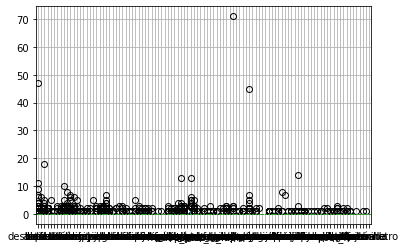

In [16]:
df_data_cliente_2022.boxplot()

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
df_data_cliente_2022_escalado = scaler.fit_transform(df_data_cliente_2022)

In [22]:
df_data_cliente_2022_escalado = pd.DataFrame(df_data_cliente_2022_escalado , columns=df_data_cliente_2022.columns)

In [26]:
df_data_cliente_2022.index

Index(['ADHETEC', 'ADRIAN GUEVARA', 'ADRIANA', 'ADSPACE', 'AEROMAR',
       'AGRINOVA', 'AKUBICA', 'ALCOM ELECTRÓNICOS DE MÉXICO', 'ALEJANDRA LEPE',
       'ALEJANDRA LEPE(RESURTIDO)',
       ...
       'VISIÓN GRAFICA', 'VUDA AUDITORIAS', 'WILD CANYON', 'WILSON LOPEZ',
       'XPRESSO EN CREATIVIDAD', 'YAKULT', 'ZEISS', 'gerardo lomeli',
       'hirschvogel', 'ic.veronicabarajas'],
      dtype='object', name='cliente', length=312)

In [29]:
df_data_cliente_2022_escalado.set_index(df_data_cliente_2022.index, inplace=True)

In [30]:

from scipy.spatial.distance import pdist, squareform

In [31]:
pd.DataFrame(squareform(pdist(df_data_cliente_2022)), columns = df_data_cliente_2022.index, index = df_data_cliente_2022.index)

cliente,ADHETEC,ADRIAN GUEVARA,ADRIANA,ADSPACE,AEROMAR,AGRINOVA,AKUBICA,ALCOM ELECTRÓNICOS DE MÉXICO,ALEJANDRA LEPE,ALEJANDRA LEPE(RESURTIDO),...,VISIÓN GRAFICA,VUDA AUDITORIAS,WILD CANYON,WILSON LOPEZ,XPRESSO EN CREATIVIDAD,YAKULT,ZEISS,gerardo lomeli,hirschvogel,ic.veronicabarajas
cliente,,,,,,,,,,,,,,,,,,,,,
ADHETEC,0.000000,16.703293,16.431677,16.124515,16.492423,16.583124,15.684387,16.186414,17.521415,16.492423,...,16.370706,16.401219,15.231546,16.462078,15.716234,16.370706,16.733201,16.370706,16.370706,16.492423
ADRIAN GUEVARA,16.703293,0.000000,3.316625,6.403124,3.000000,3.464102,3.000000,3.000000,6.928203,3.000000,...,3.000000,3.162278,3.316625,2.828427,3.162278,3.000000,4.123106,3.000000,3.000000,3.000000
ADRIANA,16.431677,3.316625,0.000000,5.656854,2.000000,2.645751,2.000000,2.000000,6.557439,2.000000,...,2.000000,1.732051,2.449490,1.732051,2.236068,1.414214,3.464102,1.414214,1.414214,2.000000
ADSPACE,16.124515,6.403124,5.656854,0.000000,5.830952,6.082763,5.656854,5.830952,7.937254,5.291503,...,5.830952,5.916080,5.656854,5.744563,5.744563,5.830952,6.480741,5.830952,5.830952,5.656854
AEROMAR,16.492423,3.000000,2.000000,5.830952,0.000000,2.236068,1.414214,1.414214,6.403124,1.414214,...,1.414214,1.732051,2.000000,1.000000,1.732051,1.414214,3.162278,1.414214,1.414214,1.414214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAKULT,16.370706,3.000000,1.414214,5.830952,1.414214,2.236068,1.414214,1.414214,6.403124,1.414214,...,1.414214,1.000000,2.000000,1.000000,1.732051,0.000000,3.162278,0.000000,0.000000,1.414214
ZEISS,16.733201,4.123106,3.464102,6.480741,3.162278,3.605551,3.162278,3.162278,7.000000,3.162278,...,3.162278,3.316625,3.464102,3.000000,3.316625,3.162278,0.000000,3.162278,3.162278,3.162278
gerardo lomeli,16.370706,3.000000,1.414214,5.830952,1.414214,2.236068,1.414214,1.414214,6.403124,1.414214,...,1.414214,1.000000,2.000000,1.000000,1.732051,0.000000,3.162278,0.000000,0.000000,1.414214


In [ ]:
pd.DataFrame(squareform(pdist(df_calif)), columns = df_calif.index, index = df_calif.index)

In [32]:
distancias_cliente_2022 = pd.DataFrame(1/(1 + squareform(pdist(df_data_cliente_2022))), columns = df_data_cliente_2022.index, index = df_data_cliente_2022.index)

In [77]:
cliente = 'ADHETEC'

cliente,ADHETEC,ADRIAN GUEVARA,ADRIANA,ADSPACE,AEROMAR,AGRINOVA,AKUBICA,ALCOM ELECTRÓNICOS DE MÉXICO,ALEJANDRA LEPE,ALEJANDRA LEPE(RESURTIDO),...,VISIÓN GRAFICA,VUDA AUDITORIAS,WILD CANYON,WILSON LOPEZ,XPRESSO EN CREATIVIDAD,YAKULT,ZEISS,gerardo lomeli,hirschvogel,ic.veronicabarajas
cliente,,,,,,,,,,,,,,,,,,,,,
ADHETEC,1.000000,0.056487,0.057367,0.058396,0.057168,0.056873,0.059936,0.058185,0.053992,0.057168,...,0.057568,0.057467,0.061608,0.057267,0.059822,0.057568,0.056391,0.057568,0.057568,0.057168
ADRIAN GUEVARA,0.056487,1.000000,0.231662,0.135078,0.250000,0.224009,0.250000,0.250000,0.126132,0.250000,...,0.250000,0.240253,0.231662,0.261204,0.240253,0.250000,0.195194,0.250000,0.250000,0.250000
ADRIANA,0.057367,0.231662,1.000000,0.150221,0.333333,0.274292,0.333333,0.333333,0.132320,0.333333,...,0.333333,0.366025,0.289898,0.366025,0.309017,0.414214,0.224009,0.414214,0.414214,0.333333
ADSPACE,0.058396,0.135078,0.150221,1.000000,0.146392,0.141188,0.150221,0.146392,0.111891,0.158945,...,0.146392,0.144591,0.150221,0.148268,0.148268,0.146392,0.133677,0.146392,0.146392,0.150221
AEROMAR,0.057168,0.250000,0.333333,0.146392,1.000000,0.309017,0.414214,0.414214,0.135078,0.414214,...,0.414214,0.366025,0.333333,0.500000,0.366025,0.414214,0.240253,0.414214,0.414214,0.414214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAKULT,0.057568,0.250000,0.414214,0.146392,0.414214,0.309017,0.414214,0.414214,0.135078,0.414214,...,0.414214,0.500000,0.333333,0.500000,0.366025,1.000000,0.240253,1.000000,1.000000,0.414214
ZEISS,0.056391,0.195194,0.224009,0.133677,0.240253,0.217129,0.240253,0.240253,0.125000,0.240253,...,0.240253,0.231662,0.224009,0.250000,0.231662,0.240253,1.000000,0.240253,0.240253,0.240253
gerardo lomeli,0.057568,0.250000,0.414214,0.146392,0.414214,0.309017,0.414214,0.414214,0.135078,0.414214,...,0.414214,0.500000,0.333333,0.500000,0.366025,1.000000,0.240253,1.000000,1.000000,0.414214


In [79]:
valores_cliente = distancias_cliente_2022['ADHETEC'][1:]

In [93]:
def recomendaciones_cliente(cliente):
    distancias_cliente = distancias_cliente_2022[cliente].drop(index = [cliente])
    df_resto = df_data_cliente_2022.T.drop(columns = [cliente])
    for otro_cliente, peso in distancias_cliente.items():
        df_resto[otro_cliente] = df_resto[otro_cliente] * peso

    return df_resto.sum(axis=1)

In [99]:
recomendaciones_cliente('ADHETEC').sort_values(ascending=False).head(20)

bolígrafo        8.310835
bolsa            6.823197
termo            4.347580
mochila          3.862732
libreta          3.763994
taza             3.065886
cilindro         3.040732
porta            3.031191
llavero          2.989307
cubrebocas       2.387735
usb              2.210369
pelota           2.116880
set              2.001914
vaso             1.930261
antiestrés       1.772589
playera          1.558245
gorra            1.329709
antibacterial    0.949356
lonchera         0.869287
celular          0.850516
dtype: float64

In [45]:
distancias_cliente_2022['VIDANTA'].sort_values(ascending = False)[1:10].index

Index(['JARDINES DE MÉXICO', 'HYUNDAI', 'BARDAHL', 'PROMODA', 'SISOLUCIONES',
       'SONS', 'JARDINES DE MEXICO', 'ADHETEC', 'BECHEM'],
      dtype='object', name='cliente')

In [40]:
distancias_cliente_2022['VIDANTA']

cliente
ADHETEC               0.035004
ADRIAN GUEVARA        0.032846
ADRIANA               0.032938
ADSPACE               0.034398
AEROMAR               0.032975
                        ...   
YAKULT                0.032975
ZEISS                 0.032828
gerardo lomeli        0.032975
hirschvogel           0.032975
ic.veronicabarajas    0.033050
Name: VIDANTA, Length: 312, dtype: float64

In [43]:
df_data_t = df_data_cliente_2022.T

In [47]:
df_data_filtrado = df_data_t[['JARDINES DE MÉXICO', 'HYUNDAI', 'BARDAHL', 'PROMODA', 'SISOLUCIONES','SONS', 'JARDINES DE MEXICO', 'ADHETEC', 'BECHEM']]

In [52]:
df_data_filtrado_t = df_data_filtrado.T

In [71]:
pd.DataFrame(df_data_filtrado_t.sum()).sort_values(by=0,ascending=False).head(10)

,0
bolígrafo,27
llavero,22
taza,13
porta,11
cilindro,11
mochila,8
bolsa,8
usb,7
termo,7
vaso,6


In [76]:
pd.DataFrame(df_data_t['VIDANTA']).sort_values(by='VIDANTA',ascending=False).head(10) 

,VIDANTA
llavero,18
porta,13
termo,10
iman,8
destapadores,6
taza,6
vaso,6
bolígrafo,5
tarro,5
joyero,5
